['pizzahut', 'pizza', 'indvsten', 'vegan', 'plantbased', 'beyondmeat', 'beyondambassador', 'vegetarian', 'veganfood', 'teacher']
2


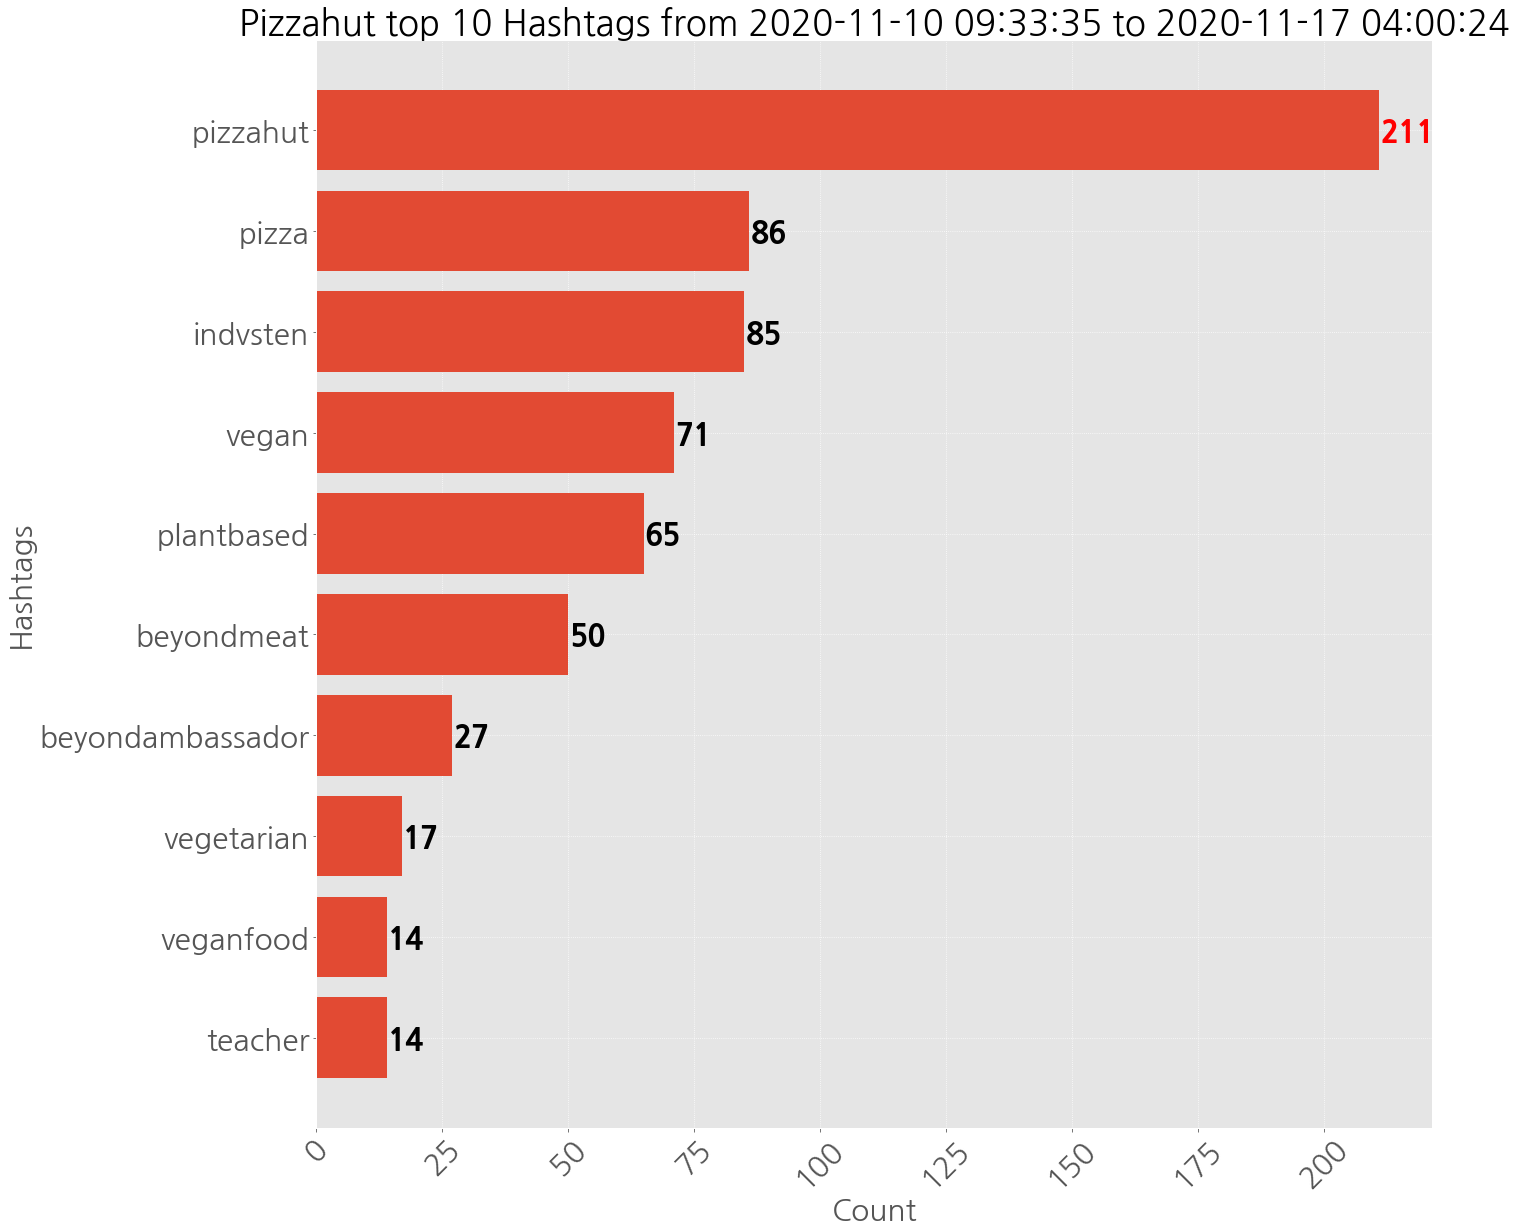

In [50]:
import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False
df=pd.read_csv('data/pizzahut.csv')

hash_li=[]
for i in range(df.shape[0]):
    temp=[]
    text=df['Hashtag List'][i]
    if type(text) !=float:
        #print(text)
        temp=text.split(',')
        for i in temp:
            i=i.lower()
            i=i.strip()
            i=i.replace("[","")
            i=i.replace("]","")
            i=i.replace("'","")
            #i=i[1:-1]
            hash_li.append(i)
hash_li = list(filter(None, hash_li))

dict_hashtag=collections.Counter(hash_li)    
top_hashtag=heapq.nlargest(10, dict_hashtag, key=dict_hashtag.get)
print(top_hashtag)

#get the count of the top x hashtags
score_hashtag=[dict_hashtag[hashtag] for hashtag in top_hashtag]

#barh plot
plt.style.use('ggplot')
plt.figure(figsize =(20,20)) 
ax=plt.barh(top_hashtag,score_hashtag)


#add grid line 
plt.grid(True,linestyle = ':',alpha=1.0)

#invert y axis
plt.gca().invert_yaxis()

#add annotation
count=1
for i in ax.patches: 
    #print(i)
    #print (ax.patches)
    if count==1:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='red')
        count+=1
        print(count)
    else:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='black')

# Formatting        

plt.yticks(fontsize=30)
plt.xticks(rotation=45,fontsize=30)
plt.xlabel('Count',fontsize= 30)
plt.ylabel('Hashtags',fontsize= 30)
max_date=df['Tweet Datetime'].max()
min_date=df['Tweet Datetime'].min()
#plt.title('Pizzahut',fontsize=35)

plt.title(f'Pizzahut top 10 Hashtags from {min_date} to {max_date}',fontsize=35)
plt.savefig('Pizzahut.png')
#plt.title(f'{brand} Top {top_x_hashtag} Hashtags count from {min_date} to {max_date}',fontsize= 35)



#plt.rc('xtick', labelsize=30) 
#plt.rc('ytick', labelsize=30)


#return plt.savefig(file_name)


In [82]:
df_text=df[['Tweet Text', 'Clean_text']]

In [56]:
df_text.style.set_properties(subset=['Tweet Text'], **{'width': '300px'})

In [114]:
def cleantext(text):
   
    
    text = text.lower().strip()             # Conver  text to lower case
    text = re.sub(r'@[A-za-z0-9]+','',text) # remove @mentions
    text = re.sub(r'RT[\s]+','',text)       #remove retweet
    text = re.sub(r'https?://\S+','',text) #remove hyperlink
    text = re.sub(r'#','',text)            #remove #

    text = text.replace('\n',' ')           #remove \n
    text = contractions.fix(text)

    stemmer = SnowballStemmer(language='english')
    text = stemmer.stem(text)
    text = re.sub("[\.\,\!\?\:\;\-\=\*\'\“\(\)\_\$\+]", "",text) # remove puntucation
    text = re.sub("[0123456789]", "", text) # remove number
    
    text = text.replace('  ','')

    return text.strip()

In [ ]:
d_te

In [67]:
df_text.head(25)

Tweet Text  \
0   RT @pizzahut: Nothing is as it seems. You have...   
1   This felt like it was missing something, And I...   
2   @pizzahut @BeyondMeat I mean pizza hit tastes ...   
3   @nancithegreat @dominos @DJBombJahlaam @DJCand...   
4   @pizzahut @BeyondMeat Delicious but too expens...   
5   RT @BrentKemnitz: Original Pizza Hut on the @W...   
6   @billcanzoneri @pizzahut @BeyondMeat i’m suspi...   
7   @pizzahut @BeyondMeat I read it as planet base...   
8           Awwwww sheee****t https://t.co/1ReFhF0cKP   
9   @pizzahut @BeyondMeat No plant based pepperoni...   
10  @pizzahut @BeyondMeat Is it all vegan? If not,...   
11  If @pizzahut starts offering vegan cheese I'll...   
12  This is the #BigDipper from #PizzaHut, #Yummy!...   
13  If I want plants on my pizza, I'll order veggi...   
14  @pizzahut @BeyondMeat Notice, not one bite tak...   
15  @HoodieKlayyy11 @BlazePizza @kayykardashhh @Ch...   
16  @N8Mozaik @pizzahut @TrueKofi @WWEBigE @Austin...   
17  This #PizzaHut's Box looks so #Retro!\n\n#Pepp...   
18  @pizzahut You're welcome I dmed the pic proof ...   
19  @BrentKemnitz @WichitaState @CityofWichita @pi...   
20  @fannationdaily Thanks for sharing this inform...   
21  @Slickhawk12 @pizzahut @pizzahutdeliver It’s c...   
22  #Tuesday Special HOT Offers !!! 🙌\n#Pasta Love...   
23  Listening to the #NewDayPod's conversation abo...   
24                               @pizzahut Disgusting   

                                           Clean_text  
0   rtnothing is as it seems you have to taste it ...  
1   this felt like it was missing something and i ...  
2   i mean pizza hit tastes like trash even withou...  
3   damn that is crazyleft us hungrydamn hrs would...  
4   delicious but too expensive compared to other ...  
5   rtoriginal pizza hut on thecampus amazing stor...  
6                             i am suspicious but wil  
7   i read it as planet based pizza and was wonder...  
8                                       awwwww sheeet  
9   no plant based pepperoni no plant based bacon ...  
10  is it all vegan if not why even make this you ...  
11  ifstarts offering vegan cheese i will fucking ...  
12  this is the bigdipper from pizzahut yummypeppe...  
13  if i want plants on my pizza i will order vegg...  
14                          notice not one bite taken  
15  this man talkin to a pizza account anywayscan ...  
16  i am just waiting for ten-twenty years to pass...  
17  this pizzahuts box looks so retropepperonipizz...  
18  you are welcome i dmed the pic proof of the co...  
19  this should be a national landmark i love pizz...  
20  thanks for sharing this information with us we...  
21  it is cuz you got that weak ass reg crustgo de...  
22  tuesday special hot offers raising hands pasta...  
23  listening to the newdaypods conversation about...  
24                                            disgust

In [63]:
import emoji

#Conver Emoji sym

def demoji(text):
    
    # import library
    import emoji
    
    #Conver Emoji to plain text
    process_text=emoji.demojize(text)
    return process_text

def find_emoji(text):
    
    #find the 'emoji' but in text form
    
    emoji_text=re.findall(':\w+:',text)
    return emoji_text


def get_hashtag_text(text):
    text= re.findall("\: \'\w+\'",text)
    hash_tag_list=[]
    for i in text:
        hashtag=re.findall("\w+",i)
    #print(type(hashtag))
        hashtag=hashtag[0]
    #print(hashtag)
        hash_tag_list.append(hashtag)
    
    return hash_tag_list

def modify_hashtags_col(df,hashtag_col):
    df['Hashtags']=df[hashtag_col].apply(lambda x: get_hashtag_text(x))
    return df

In [123]:
df_text['demoji_text']=df_text['Tweet Text'].apply(lambda x: demoji(x))


C:\Users\ki993\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df_text.head(25)

Tweet Text  \
0   RT @pizzahut: Nothing is as it seems. You have...   
1   This felt like it was missing something, And I...   
2   @pizzahut @BeyondMeat I mean pizza hit tastes ...   
3   @nancithegreat @dominos @DJBombJahlaam @DJCand...   
4   @pizzahut @BeyondMeat Delicious but too expens...   
5   RT @BrentKemnitz: Original Pizza Hut on the @W...   
6   @billcanzoneri @pizzahut @BeyondMeat i’m suspi...   
7   @pizzahut @BeyondMeat I read it as planet base...   
8           Awwwww sheee****t https://t.co/1ReFhF0cKP   
9   @pizzahut @BeyondMeat No plant based pepperoni...   
10  @pizzahut @BeyondMeat Is it all vegan? If not,...   
11  If @pizzahut starts offering vegan cheese I'll...   
12  This is the #BigDipper from #PizzaHut, #Yummy!...   
13  If I want plants on my pizza, I'll order veggi...   
14  @pizzahut @BeyondMeat Notice, not one bite tak...   
15  @HoodieKlayyy11 @BlazePizza @kayykardashhh @Ch...   
16  @N8Mozaik @pizzahut @TrueKofi @WWEBigE @Austin...   
17  This #PizzaHut's Box looks so #Retro!\n\n#Pepp...   
18  @pizzahut You're welcome I dmed the pic proof ...   
19  @BrentKemnitz @WichitaState @CityofWichita @pi...   
20  @fannationdaily Thanks for sharing this inform...   
21  @Slickhawk12 @pizzahut @pizzahutdeliver It’s c...   
22  #Tuesday Special HOT Offers !!! 🙌\n#Pasta Love...   
23  Listening to the #NewDayPod's conversation abo...   
24                               @pizzahut Disgusting   

                                           Clean_text  \
0   rtnothing is as it seems you have to taste it ...   
1   this felt like it was missing something and i ...   
2   i mean pizza hit tastes like trash even withou...   
3   damn that is crazyleft us hungrydamn hrs would...   
4   delicious but too expensive compared to other ...   
5   rtoriginal pizza hut on thecampus amazing stor...   
6                             i am suspicious but wil   
7   i read it as planet based pizza and was wonder...   
8                                       awwwww sheeet   
9   no plant based pepperoni no plant based bacon ...   
10  is it all vegan if not why even make this you ...   
11  ifstarts offering vegan cheese i will fucking ...   
12  this is the bigdipper from pizzahut yummypeppe...   
13  if i want plants on my pizza i will order vegg...   
14                          notice not one bite taken   
15  this man talkin to a pizza account anywayscan ...   
16  i am just waiting for ten-twenty years to pass...   
17  this pizzahuts box looks so retropepperonipizz...   
18  you are welcome i dmed the pic proof of the co...   
19  this should be a national landmark i love pizz...   
20  thanks for sharing this information with us we...   
21  it is cuz you got that weak ass reg crustgo de...   
22  tuesday special hot offers raising hands pasta...   
23  listening to the newdaypods conversation about...   
24                                            disgust   

                                          demoji_text  
0   RT @pizzahut: Nothing is as it seems. You have...  
1   This felt like it was missing something, And I...  
2   @pizzahut @BeyondMeat I mean pizza hit tastes ...  
3   @nancithegreat @dominos @DJBombJahlaam @DJCand...  
4   @pizzahut @BeyondMeat Delicious but too expens...  
5   RT @BrentKemnitz: Original Pizza Hut on the @W...  
6   @billcanzoneri @pizzahut @BeyondMeat i’m suspi...  
7   @pizzahut @BeyondMeat I read it as planet base...  
8           Awwwww sheee****t https://t.co/1ReFhF0cKP  
9   @pizzahut @BeyondMeat No plant based pepperoni...  
10  @pizzahut @BeyondMeat Is it all vegan? If not,...  
11  If @pizzahut starts offering vegan cheese I'll...  
12  This is the #BigDipper from #PizzaHut, #Yummy!...  
13  If I want plants on my pizza, I'll order veggi...  
14  @pizzahut @BeyondMeat Notice, not one bite tak...  
15  @HoodieKlayyy11 @BlazePizza @kayykardashhh @Ch...  
16  @N8Mozaik @pizzahut @TrueKofi @WWEBigE @Austin...  
17  This #PizzaHut's Box looks so #Retro!\n\n#Pepp...  
18  @pizzahut

In [98]:
df_text['emoji']=df_text['demoji_text'].apply(lambda x : find_emoji(x))

C:\Users\ki993\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_text['Tweet Text'][22]

'#Tuesday Special HOT Offers !!! 🙌\n#Pasta Lover !!!!😋\n \n#PASTA COMBO !!!\nRegular Pasta + 375ML Can for $12.95 PICK UP OR DELIVERY\n\nPizza near You at Orange\n\nCONTACTLESS Delivery and Pick Up now available.\n\nOrder Online NOW !\n\n☎️ (02) 63 60 09 06\n➡️ https://t.co/m6SPD7kK2j https://t.co/AW83SGbsyJ'

In [134]:
df_text['clean_text'][22]=re.sub("[\.\,\!\?\:\;\-\=\*\'\“\(\)\_\$\+]", "",df_text['clean_text'][22])

In [132]:
df_text['demoji_text'][22]

'#Tuesday Special HOT Offers !!! :raising_hands:\n#Pasta Lover !!!!:face_savoring_food:\n \n#PASTA COMBO !!!\nRegular Pasta + 375ML Can for $12.95 PICK UP OR DELIVERY\n\nPizza near You at Orange\n\nCONTACTLESS Delivery and Pick Up now available.\n\nOrder Online NOW !\n\n:telephone_selector: (02) 63 60 09 06\n:right_arrow_selector: https://t.co/m6SPD7kK2j https://t.co/AW83SGbsyJ'

In [136]:
df_text['Clean_text'][22]

'tuesday special hot offers raising hands pasta lover face savoring food pasta comboregular pasta + ml can for $ pick up or deliverypizza near you at orangecontactless delivery and pick up now availableorder online now telephone selector right arrow selector'

In [99]:
df_text['emoji'][22]

[':raising_hands:',
 ':face_savoring_food:',
 ':telephone_selector:',
 ':right_arrow_selector:']

In [96]:
import re

text="'#Tuesday Special HOT Offers !!! :raising_hands:\n#Pasta Lover !!!!:face_savoring_food:\n \n#PASTA COMBO !!!\nRegular Pasta + 375ML Can for $12.95 PICK UP OR DELIVERY\n\nPizza near You at Orange\n\nCONTACTLESS Delivery and Pick Up now available.\n\nOrder Online NOW !\n\n:telephone_selector: (02) 63 60 09 06\n:right_arrow_selector: https://t.co/m6SPD7kK2j https://t.co/AW83SGbsyJ'"
emoji_text=re.findall(':\w+:',text)
emoji_text

[':raising_hands:',
 ':face_savoring_food:',
 ':telephone_selector:',
 ':right_arrow_selector:']

In [124]:
import contractions

df_text['clean_text']=df_text['demoji_text'].apply(lambda x:cleantext(x))

C:\Users\ki993\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df_pos=df[df['Sentiment Class']=='Positive']

df_pos=df_pos.reset_index()

In [94]:
df_text.head(23)

Tweet Text  \
0   RT @pizzahut: Nothing is as it seems. You have...   
1   This felt like it was missing something, And I...   
2   @pizzahut @BeyondMeat I mean pizza hit tastes ...   
3   @nancithegreat @dominos @DJBombJahlaam @DJCand...   
4   @pizzahut @BeyondMeat Delicious but too expens...   
5   RT @BrentKemnitz: Original Pizza Hut on the @W...   
6   @billcanzoneri @pizzahut @BeyondMeat i’m suspi...   
7   @pizzahut @BeyondMeat I read it as planet base...   
8           Awwwww sheee****t https://t.co/1ReFhF0cKP   
9   @pizzahut @BeyondMeat No plant based pepperoni...   
10  @pizzahut @BeyondMeat Is it all vegan? If not,...   
11  If @pizzahut starts offering vegan cheese I'll...   
12  This is the #BigDipper from #PizzaHut, #Yummy!...   
13  If I want plants on my pizza, I'll order veggi...   
14  @pizzahut @BeyondMeat Notice, not one bite tak...   
15  @HoodieKlayyy11 @BlazePizza @kayykardashhh @Ch...   
16  @N8Mozaik @pizzahut @TrueKofi @WWEBigE @Austin...   
17  This #PizzaHut's Box looks so #Retro!\n\n#Pepp...   
18  @pizzahut You're welcome I dmed the pic proof ...   
19  @BrentKemnitz @WichitaState @CityofWichita @pi...   
20  @fannationdaily Thanks for sharing this inform...   
21  @Slickhawk12 @pizzahut @pizzahutdeliver It’s c...   
22  #Tuesday Special HOT Offers !!! 🙌\n#Pasta Love...   

                                           Clean_text  \
0   rtnothing is as it seems you have to taste it ...   
1   this felt like it was missing something and i ...   
2   i mean pizza hit tastes like trash even withou...   
3   damn that is crazyleft us hungrydamn hrs would...   
4   delicious but too expensive compared to other ...   
5   rtoriginal pizza hut on thecampus amazing stor...   
6                             i am suspicious but wil   
7   i read it as planet based pizza and was wonder...   
8                                       awwwww sheeet   
9   no plant based pepperoni no plant based bacon ...   
10  is it all vegan if not why even make this you ...   
11  ifstarts offering vegan cheese i will fucking ...   
12  this is the bigdipper from pizzahut yummypeppe...   
13  if i want plants on my pizza i will order vegg...   
14                          notice not one bite taken   
15  this man talkin to a pizza account anywayscan ...   
16  i am just waiting for ten-twenty years to pass...   
17  this pizzahuts box looks so retropepperonipizz...   
18  you are welcome i dmed the pic proof of the co...   
19  this should be a national landmark i love pizz...   
20  thanks for sharing this information with us we...   
21  it is cuz you got that weak ass reg crustgo de...   
22  tuesday special hot offers raising hands pasta...   

                                          demoji_text  \
0   RT @pizzahut: Nothing is as it seems. You have...   
1   This felt like it was missing something, And I...   
2   @pizzahut @BeyondMeat I mean pizza hit tastes ...   
3   @nancithegreat @dominos @DJBombJahlaam @DJCand...   
4   @pizzahut @BeyondMeat Delicious but too expens...   
5   RT @BrentKemnitz: Original Pizza Hut on the @W...   
6   @billcanzoneri @pizzahut @BeyondMeat i’m suspi...   
7   @pizzahut @BeyondMeat I read it as planet base...   
8           Awwwww sheee****t https://t.co/1ReFhF0cKP   
9   @pizzahut @BeyondMeat No plant based pepperoni...   
10  @pizzahut @BeyondMeat Is it all vegan? If not,...   
11  If @pizzahut starts offering vegan cheese I'll...   
12  This is the #BigDipper from #PizzaHut, #Yummy!...   
13  If I want plants on my pizza, I'll order veggi...   
14  @pizzahut @BeyondMeat Notice, not one bite tak...   
15  @HoodieKlayyy11 @BlazePizza @kayykardashhh @Ch...   
16  @N8Mozaik @pizzahut @TrueKofi @WWEBigE @Austin...   
17  This #PizzaHut's Box looks so #Retro!\n\n#Pepp...   
18  @pizzahut You're welcome I dmed the pic proof ...   
19  @BrentKemnitz @WichitaState @CityofWichita @pi...   
20  @fannationdaily Thanks for sharing this inform...   
21  @Slickhawk12 @pizzahut @pizzahutdeliver It’s c.

['pizzahut', 'indvsten', 'pizza', 'plantbased', 'vegan', 'beyondmeat', 'beyondambassador', 'veganfood', 'teacher', 'vegetarian']
2


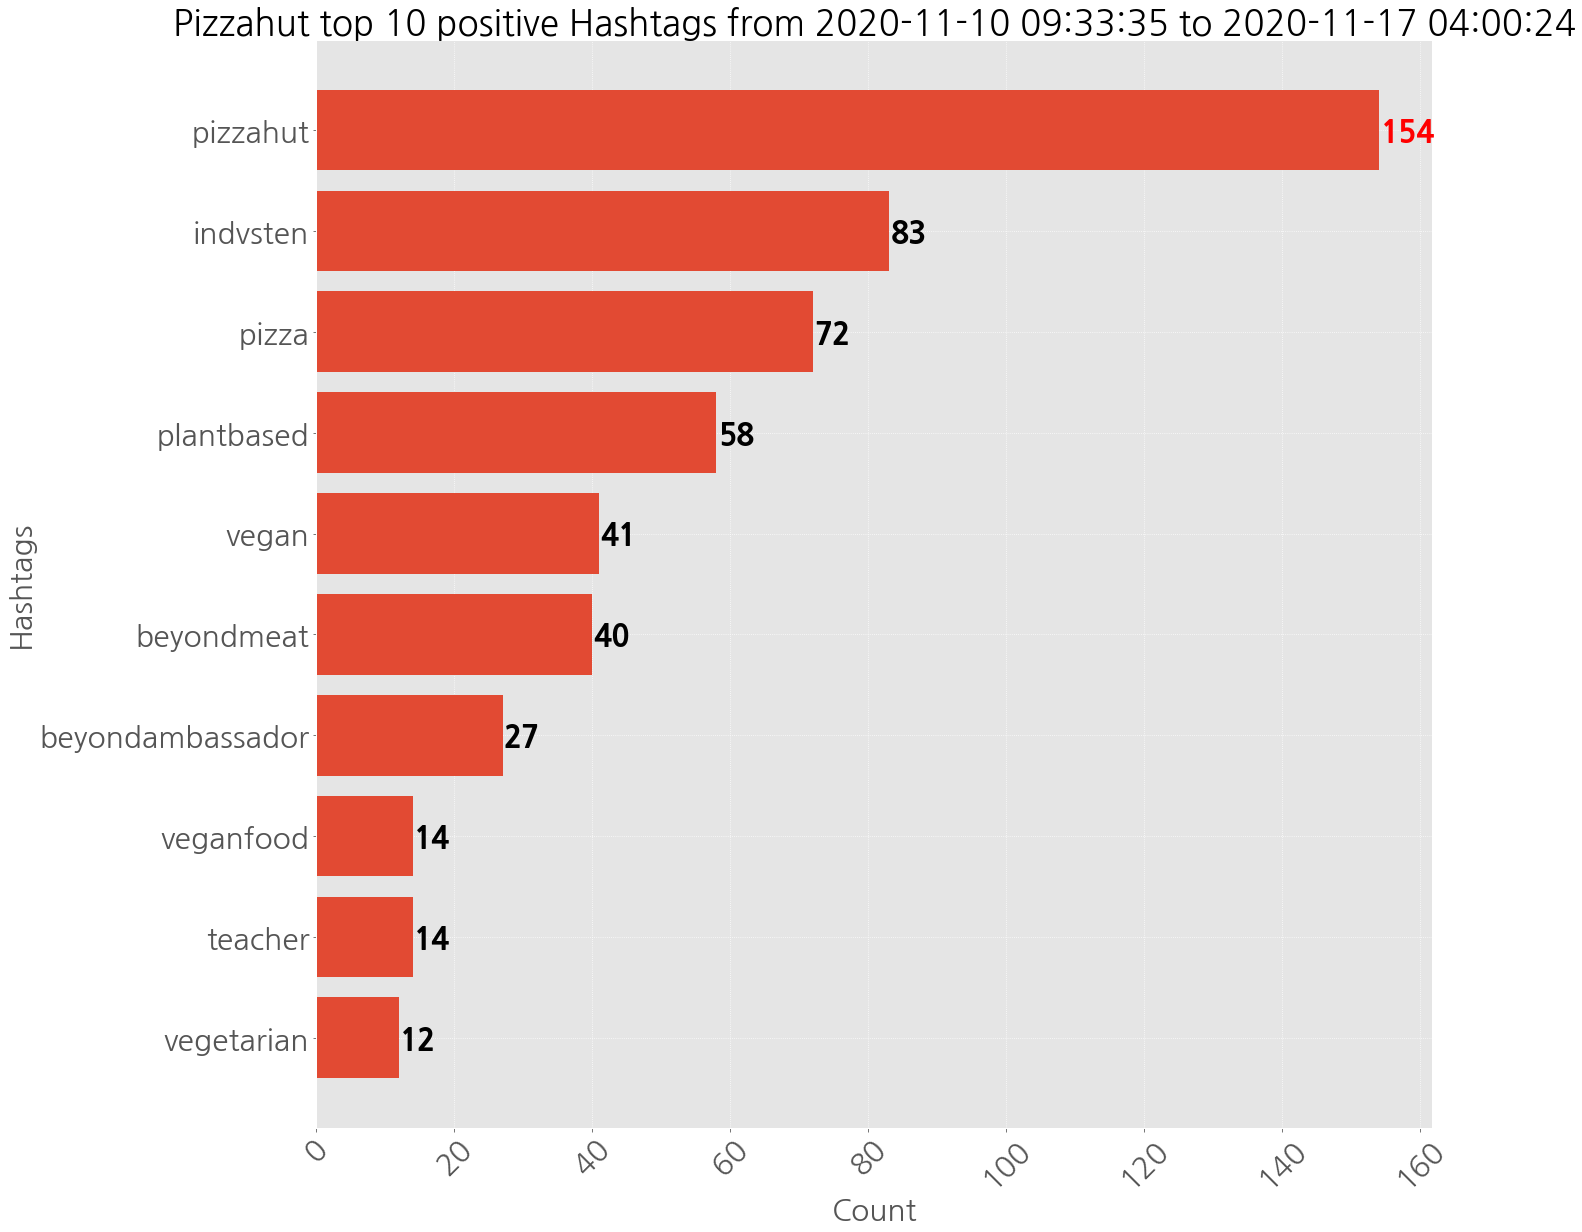

In [37]:
import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False
#df=pd.read_csv('data/pizzahut.csv')

hash_li=[]
for i in range(df_pos.shape[0]):
    temp=[]
    text=df_pos['Hashtag List'][i]
    if type(text) !=float:
        #print(text)
        temp=text.split(',')
        for i in temp:
            i=i.lower()
            i=i.strip()
            i=i.replace("[","")
            i=i.replace("]","")
            i=i.replace("'","")
            #i=i[1:-1]
            hash_li.append(i)
hash_li = list(filter(None, hash_li))

dict_hashtag=collections.Counter(hash_li)    
top_hashtag=heapq.nlargest(10, dict_hashtag, key=dict_hashtag.get)
print(top_hashtag)

#get the count of the top x hashtags
score_hashtag=[dict_hashtag[hashtag] for hashtag in top_hashtag]

#barh plot
plt.style.use('ggplot')
plt.figure(figsize =(20,20)) 
ax=plt.barh(top_hashtag,score_hashtag)


#add grid line 
plt.grid(True,linestyle = ':',alpha=1.0)

#invert y axis
plt.gca().invert_yaxis()

#add annotation
count=1
for i in ax.patches: 
    #print(i)
    #print (ax.patches)
    if count==1:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='red')
        count+=1
        print(count)
    else:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='black')

# Formatting        

plt.yticks(fontsize=30)
plt.xticks(rotation=45,fontsize=30)
plt.xlabel('Count',fontsize= 30)
plt.ylabel('Hashtags',fontsize= 30)
max_date=df['Tweet Datetime'].max()
min_date=df['Tweet Datetime'].min()
#plt.title('Pizzahut',fontsize=35)

plt.title(f'Pizzahut top 10 positive Hashtags from {min_date} to {max_date}',fontsize=35)
plt.savefig('Pizzahut_positive.png')

['pizzahut', 'vegan', 'pizza', 'gameon', 'beyondmeat', 'plantbased', 'vegetarian', 'wendys', 'bankruptcy', 'fortheloveofpizza']
2


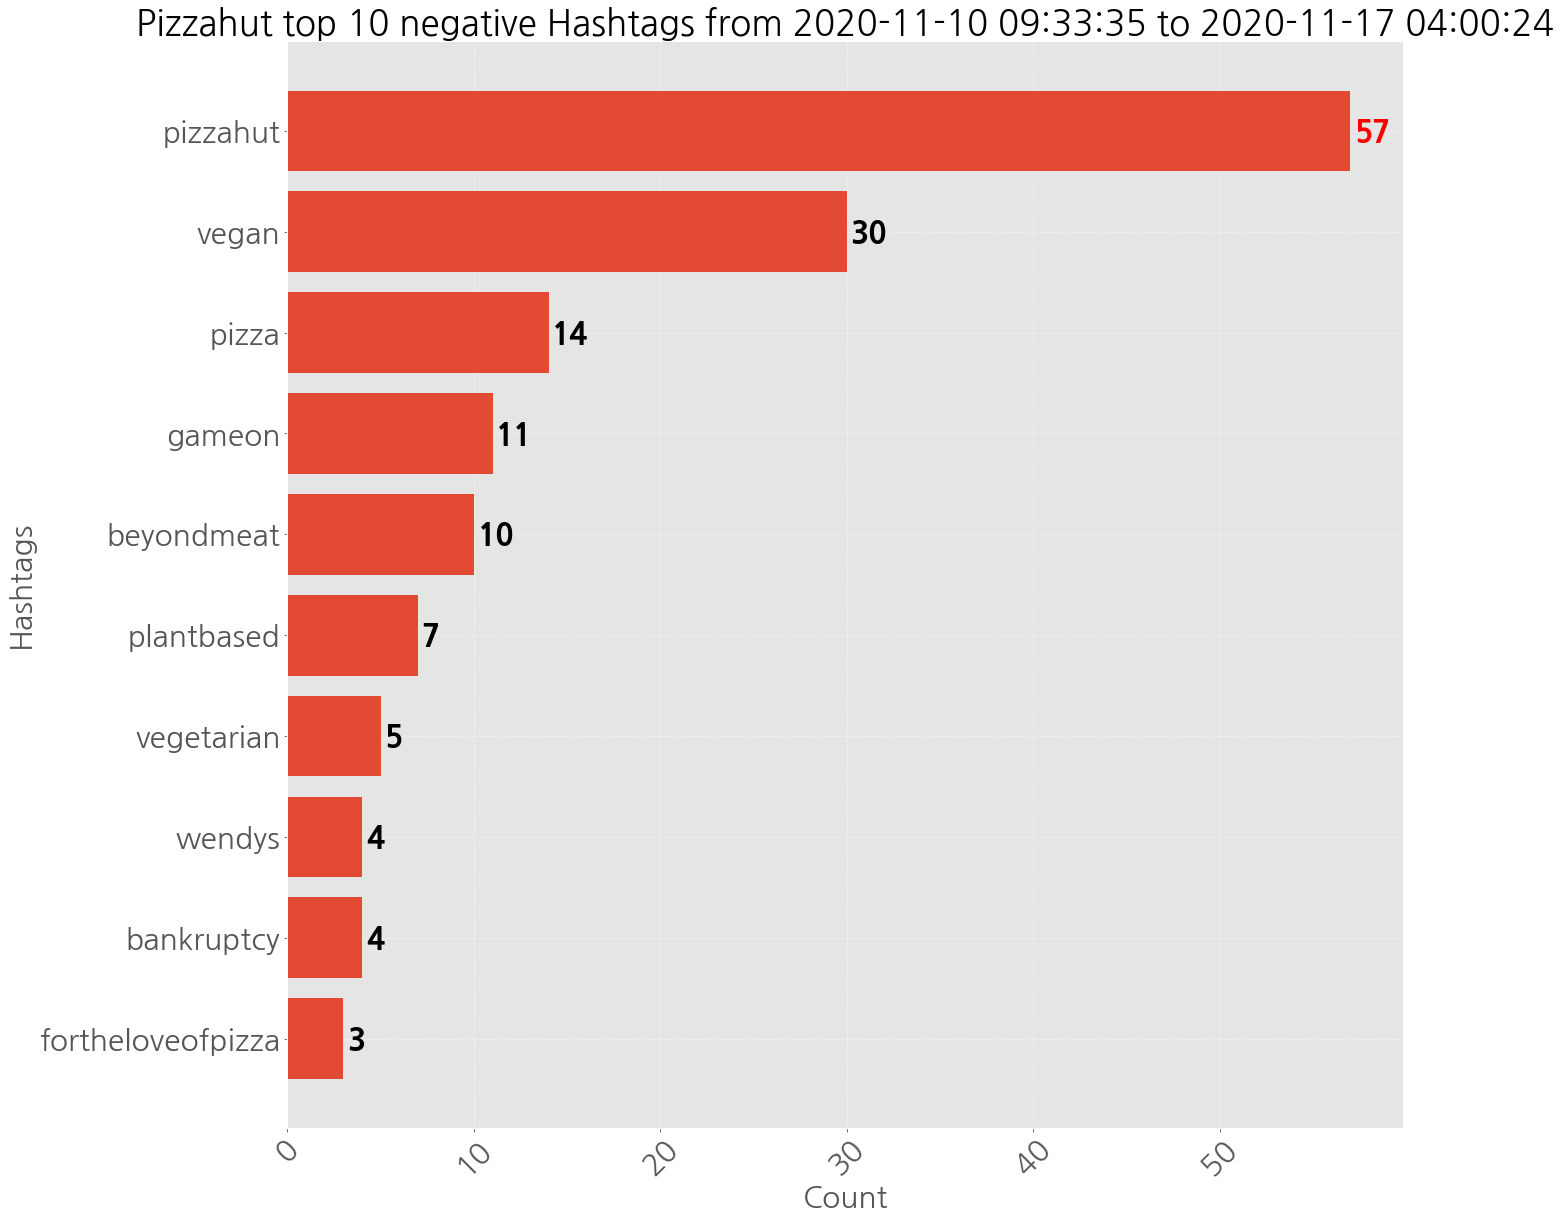

In [38]:


df_neg=df_neg.reset_index()

import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False
#df=pd.read_csv('data/pizzahut.csv')

hash_li=[]
for i in range(df_neg.shape[0]):
    temp=[]
    text=df_neg['Hashtag List'][i]
    if type(text) !=float:
        #print(text)
        temp=text.split(',')
        for i in temp:
            i=i.lower()
            i=i.strip()
            i=i.replace("[","")
            i=i.replace("]","")
            i=i.replace("'","")
            #i=i[1:-1]
            hash_li.append(i)
hash_li = list(filter(None, hash_li))

dict_hashtag=collections.Counter(hash_li)    
top_hashtag=heapq.nlargest(10, dict_hashtag, key=dict_hashtag.get)
print(top_hashtag)

#get the count of the top x hashtags
score_hashtag=[dict_hashtag[hashtag] for hashtag in top_hashtag]

#barh plot
plt.style.use('ggplot')
plt.figure(figsize =(20,20)) 
ax=plt.barh(top_hashtag,score_hashtag)


#add grid line 
plt.grid(True,linestyle = ':',alpha=1.0)

#invert y axis
plt.gca().invert_yaxis()

#add annotation
count=1
for i in ax.patches: 
    #print(i)
    #print (ax.patches)
    if count==1:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='red')
        count+=1
        print(count)
    else:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='black')

# Formatting        

plt.yticks(fontsize=30)
plt.xticks(rotation=45,fontsize=30)
plt.xlabel('Count',fontsize= 30)
plt.ylabel('Hashtags',fontsize= 30)
max_date=df['Tweet Datetime'].max()
min_date=df['Tweet Datetime'].min()
#plt.title('Pizzahut',fontsize=35)

plt.title(f'Pizzahut top 10 negative Hashtags from {min_date} to {max_date}',fontsize=35)
plt.savefig('Pizzahut_negative.png')

In [26]:
df.shape,df_neg.shape,df_pos.shape,df['Sentiment Class'].value_counts()

((6721, 21),
 (2253, 21),
 (4468, 22),
 Positive    4468
 Negative    2253
 Name: Sentiment Class, dtype: int64)

In [34]:
df_neg=df[df['Sentiment Class']=='Negative']

In [35]:
df_pos['Sentiment Class'].value_counts(),df_neg['Sentiment Class'].value_counts()


(Positive    4468
 Name: Sentiment Class, dtype: int64,
 Negative    2253
 Name: Sentiment Class, dtype: int64)

In [17]:
df_pos.reset_index()


index  Unnamed: 0                                         Tweet Text  \
0         0       39999  RT @pizzahut: Nothing is as it seems. You have...   
1         2       40001  @pizzahut @BeyondMeat I mean pizza hit tastes ...   
2         5       40004  RT @BrentKemnitz: Original Pizza Hut on the @W...   
3         8       40007          Awwwww sheee****t https://t.co/1ReFhF0cKP   
4        10       40009  @pizzahut @BeyondMeat Is it all vegan? If not,...   
...     ...         ...                                                ...   
4463   6714       46713  @SeanAllmark1 @pizzahut @dominos Gagh! Not dom...   
4464   6715       46714  Big @pizzahut #Food #news this morning - are y...   
4465   6716       46715  1: Go to https://t.co/UxaVkZV3SF 2: Order your...   
4466   6718       46717                            @pizzahut yall got piza   
4467   6720       46719  Healthy Domino's pizza homemade \nWatch full v...   

           Tweet Datetime      Tweet Id   Twitter @ Name       User Id  \
0     2020-11-17 04:00:24  1.328549e+18    igitsjustAndy  1.045302e+18   
1     2020-11-17 03:56:31  1.328548e+18          CDebuff  2.859857e+09   
2     2020-11-17 03:47:46  1.328545e+18      theraynoldo  2.803882e+09   
3     2020-11-17 03:43:45  1.328544e+18        ywebb2020  1.595548e+09   
4     2020-11-17 03:40:01  1.328543e+18    winning7grams  5.994887e+08   
...                   ...           ...              ...           ...   
4463  2020-11-10 11:11:52  1.326120e+18   Artemisapphire  1.308111e+08   
4464  2020-11-10 11:10:43  1.326120e+18  CristineStruble  8.429103e+07   
4465  2020-11-10 10:08:57  1.326105e+18  NigeriaPizzaHut  1.016668e+18   
4466  2020-11-10 09:40:03  1.326097e+18    Bobbyxswag360  1.004745e+18   
4467  2020-11-10 09:33:35  1.326096e+18  TheSecretKitch2  1.081759e+18   

     User Location  Retweets  Favorites  ...  User Follower Counts  \
0              NaN      16.0        0.0  ...                  71.0   
1              NaN       0.0        0.0  ...                   5.0   
2         Wichita        7.0        0.0  ...                 419.0   
3              NaN       0.0        0.0  ...                  55.0   
4              NaN       0.0        0.0  ...                  32.0   
...            ...       ...        ...  ...                   ...   
4463       ShiKahr       0.0        1.0  ...                1399.0   
4464           NaN       0.0        3.0  ...               13449.0   
4465       Nigeria       0.0        0.0  ...                 184.0   
4466      nuketown       0.0        0.0  ...                 711.0   
4467           NaN       0.0        0.0  ...                  14.0   

      User Following Counts  Tweet Coordinates  Place Info  \
0                     250.0                NaN         NaN   
1                      33.0                NaN         NaN   
2                     680.0                NaN         NaN   
3                     680.0                NaN         NaN   
4                      79.0                NaN         NaN   
...                     ...                ...         ...   
4463                 2053.0                NaN         NaN   
4464                 9359.0                NaN         NaN   
4465                  135.0                NaN         NaN   
4466                   81.0                NaN         NaN   
4467                   53.0                NaN         NaN   

                                               Hashtags   Keyword  \
0                                                    []  pizzahut   
1                                                    []  pizzahut   
2                                                    []  pizzahut   
3                                                    []  pizzahut   
4                                                    []  pizzahut   
...                                                 ...       ...   
4463                                                 []  pizzahut   
4464                          ['Food', 'ne

In [41]:
import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False
#fprop = fm.FontProperties(fname='C:/Users/ki993/anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.otf')

df_mc=pd.read_csv('data/McDonald.csv')




In [43]:
df_mc_neg=df_mc[df_mc['Sentiment Class']=='Negative']
df_mc_pos=df_mc[df_mc['Sentiment Class']=='Positive']
df_mc_pos=df_mc_pos.reset_index()
df_mc_neg=df_mc_neg.reset_index()

['imaceleb', 'mcdonalds', 'youretooyoungformeif', 'reindeerready', 'shingekinokyojin', 'bertholdt', 'mcplant', 'imacelebrity', 'smartnews', 'bizarrefastfoodcomplaints']
2


Text(0.5, 1.0, 'Macdonald top 10  negative Hashtags from 2020-11-10 09:33:35 to 2020-11-17 04:00:24')

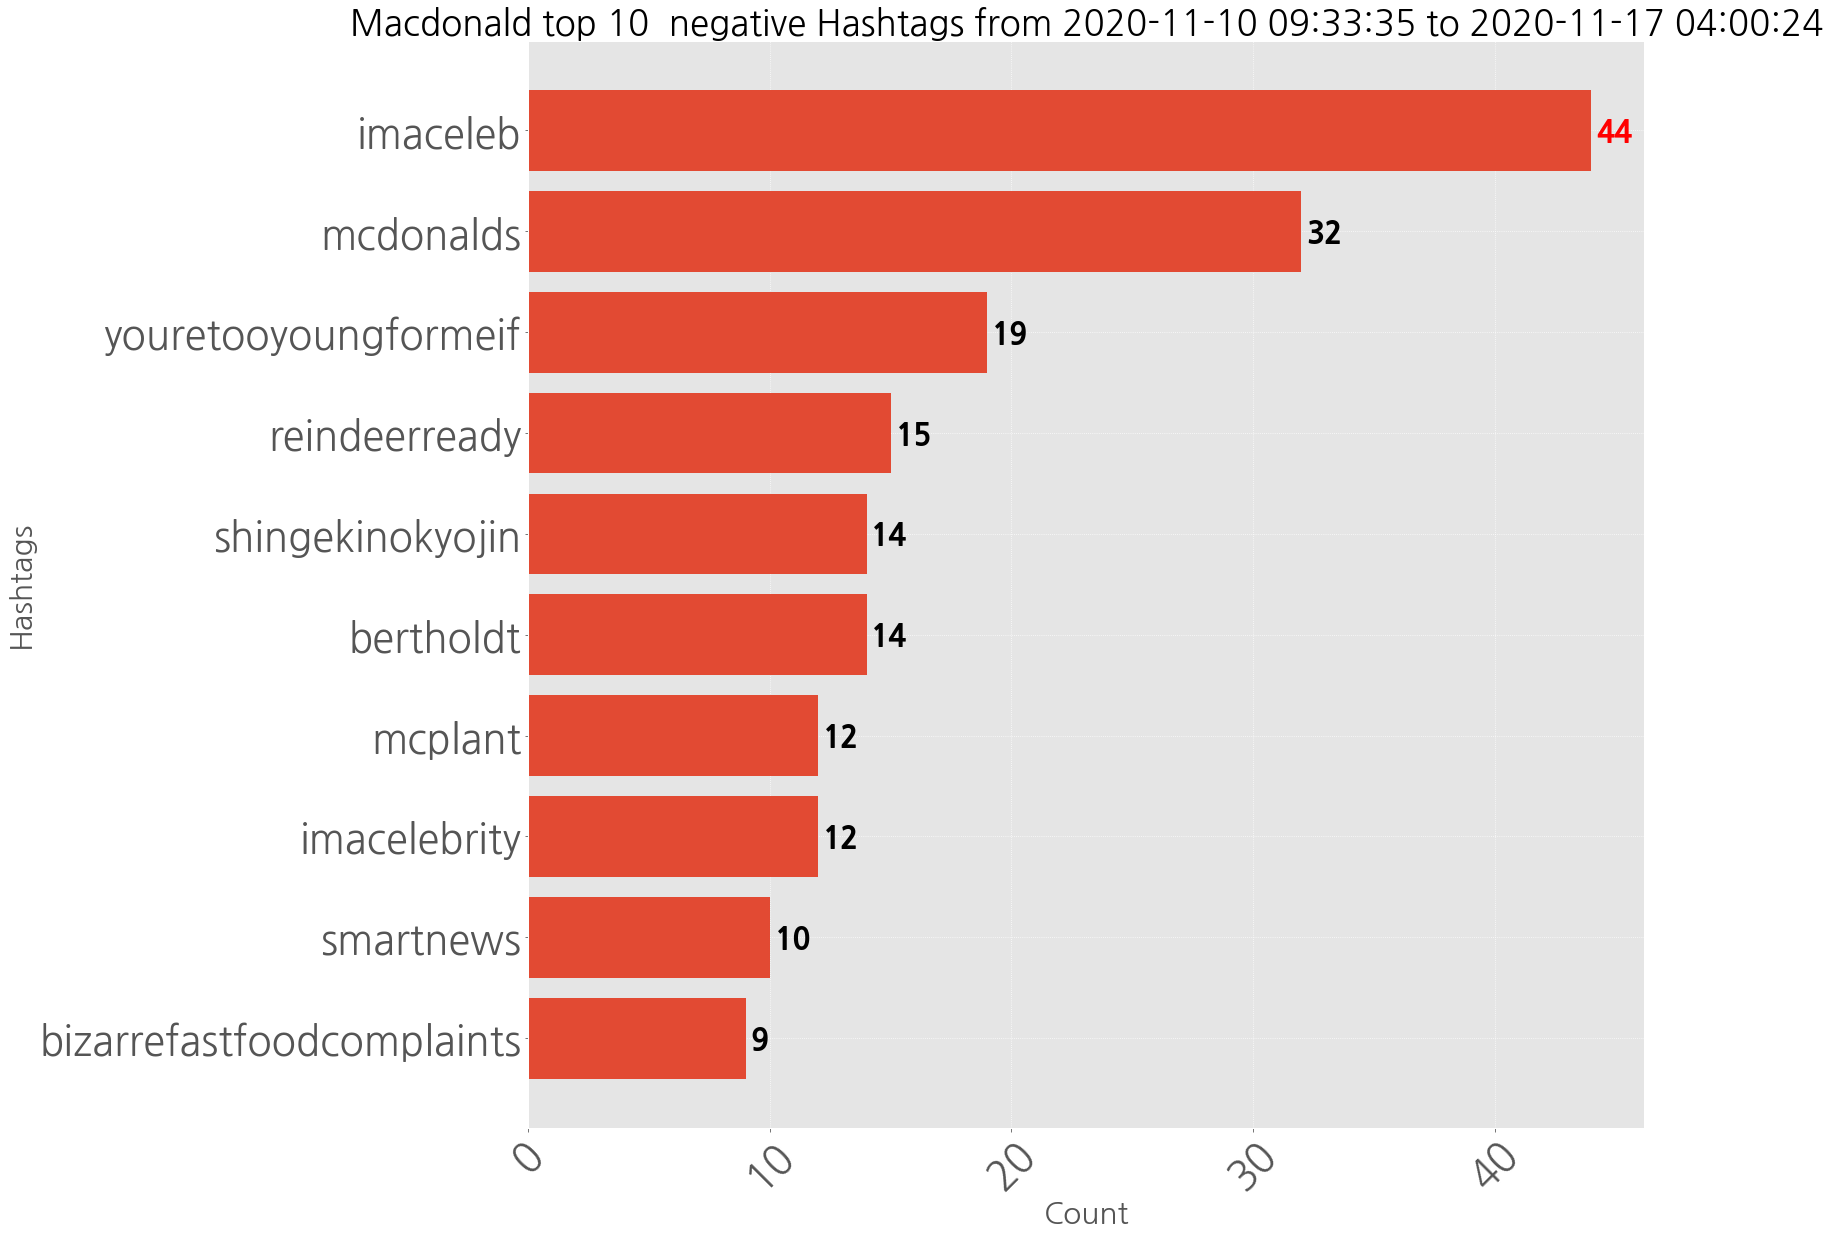

In [49]:

import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

hash_li=[]
for i in range(df_mc_neg.shape[0]):
    temp=[]
    text=df_mc_neg['Hashtag List'][i]
    if type(text) !=float:
        #print(text)
        temp=text.split(',')
        for i in temp:
            i=i.lower()
            i=i.strip()
            i=i.replace("[","")
            i=i.replace("]","")
            i=i.replace("'","")
            #i=i[1:-1]
            hash_li.append(i)
hash_li = list(filter(None, hash_li))

dict_hashtag=collections.Counter(hash_li)    
top_hashtag=heapq.nlargest(10, dict_hashtag, key=dict_hashtag.get)
print(top_hashtag)

#get the count of the top x hashtags
score_hashtag=[dict_hashtag[hashtag] for hashtag in top_hashtag]

#barh plot
plt.style.use('ggplot')
plt.figure(figsize =(20,20)) 
ax=plt.barh(top_hashtag,score_hashtag)


#add grid line 
plt.grid(True,linestyle = ':',alpha=1.0)

#invert y axis
plt.gca().invert_yaxis()

#add annotation
count=1
for i in ax.patches: 
    #print(i)
    #print (ax.patches)
    if count==1:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='red')
        count+=1
        print(count)
    else:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='black')

# Formatting   

plt.yticks(fontsize=40)
plt.xticks(rotation=45,fontsize=40)
plt.xlabel('Count',fontsize= 30)
plt.ylabel('Hashtags',fontsize= 30)
max_date=df['Tweet Datetime'].max()
min_date=df['Tweet Datetime'].min()
#plt.title('Macdonald',fontsize=35)

plt.title(f'Macdonald top 10  negative Hashtags from {min_date} to {max_date}',fontsize=35)

['funko', 'funkopop', 'imaceleb', 'beleng', 'smallaxe', 'engbel', 'hisdarkmaterials', 'mcdonalds', '범규', 'txt_beomgyu']
2


Text(0.5, 1.0, 'Macdonald top 10 positive Hashtags from 2020-11-10 09:33:35 to 2020-11-17 04:00:24')

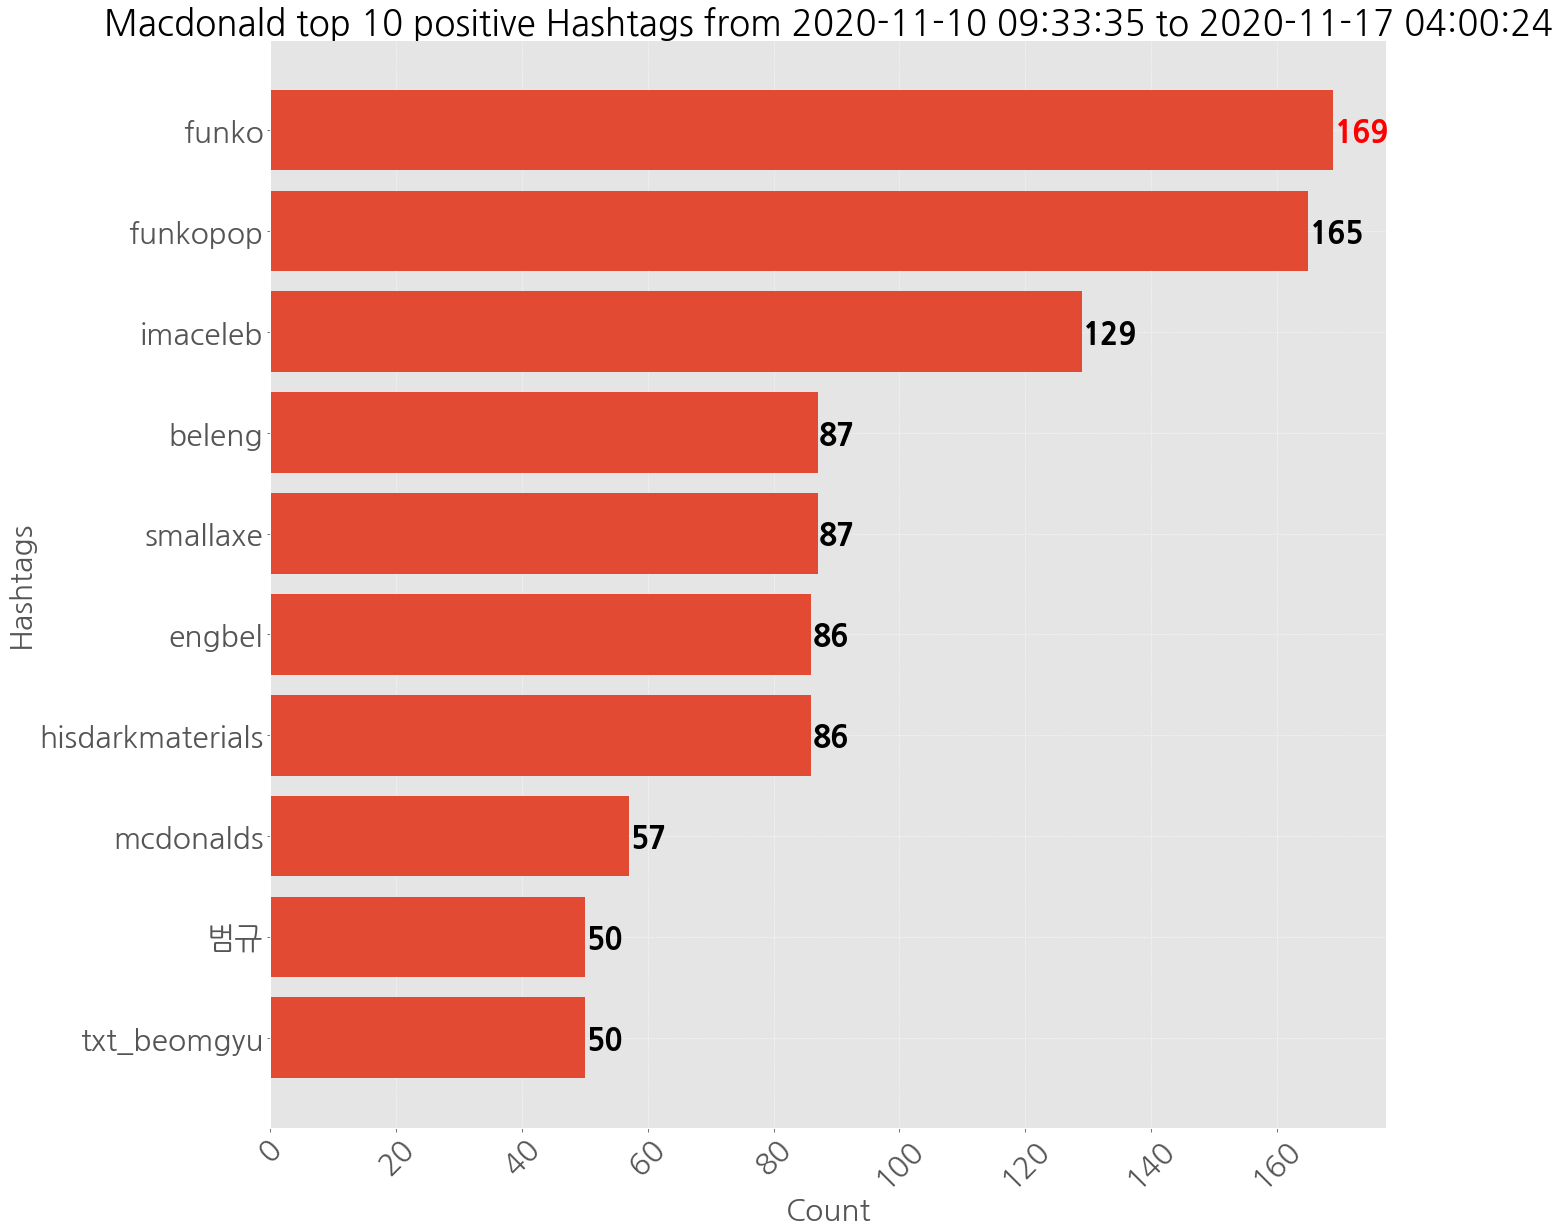

In [47]:
import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

hash_li=[]
for i in range(df_mc_pos.shape[0]):
    temp=[]
    text=df_mc_pos['Hashtag List'][i]
    if type(text) !=float:
        #print(text)
        temp=text.split(',')
        for i in temp:
            i=i.lower()
            i=i.strip()
            i=i.replace("[","")
            i=i.replace("]","")
            i=i.replace("'","")
            #i=i[1:-1]
            hash_li.append(i)
hash_li = list(filter(None, hash_li))

dict_hashtag=collections.Counter(hash_li)    
top_hashtag=heapq.nlargest(10, dict_hashtag, key=dict_hashtag.get)
print(top_hashtag)

#get the count of the top x hashtags
score_hashtag=[dict_hashtag[hashtag] for hashtag in top_hashtag]

#barh plot
plt.style.use('ggplot')
plt.figure(figsize =(20,20)) 
ax=plt.barh(top_hashtag,score_hashtag)


#add grid line 
plt.grid(True,linestyle = ':',alpha=1.0)

#invert y axis
plt.gca().invert_yaxis()

#add annotation
count=1
for i in ax.patches: 
    #print(i)
    #print (ax.patches)
    if count==1:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='red')
        count+=1
        print(count)
    else:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ='bold', 
                 color ='black')

# Formatting   

plt.yticks(fontsize=30)
plt.xticks(rotation=45,fontsize=30)
plt.xlabel('Count',fontsize= 30)
plt.ylabel('Hashtags',fontsize= 30)
max_date=df['Tweet Datetime'].max()
min_date=df['Tweet Datetime'].min()
#plt.title('Macdonald',fontsize=35)

plt.title(f'Macdonald top 10 positive Hashtags from {min_date} to {max_date}',fontsize=35)

In [118]:
text="tuesday special hot offers raising hands pasta lover face savoring food pasta comboregular pasta + ml can for $ pick up or deliverypizza near you at orangecontactless delivery and pick up now availableorder online now telephone selector right arrow selector"

re.sub("[\.\,\!\?\:\;\-\=\*\'\“\(\)\_\$\+]", "",text)

'tuesday special hot offers raising hands pasta lover face savoring food pasta comboregular pasta  ml can for  pick up or deliverypizza near you at orangecontactless delivery and pick up now availableorder online now telephone selector right arrow selector'

In [137]:
df

Unnamed: 0                                         Tweet Text  \
0          39999  RT @pizzahut: Nothing is as it seems. You have...   
1          40000  This felt like it was missing something, And I...   
2          40001  @pizzahut @BeyondMeat I mean pizza hit tastes ...   
3          40002  @nancithegreat @dominos @DJBombJahlaam @DJCand...   
4          40003  @pizzahut @BeyondMeat Delicious but too expens...   
...          ...                                                ...   
6716       46715  1: Go to https://t.co/UxaVkZV3SF 2: Order your...   
6717       46716  @frankmorano What’s wrong with @pizzahut ? The...   
6718       46717                            @pizzahut yall got piza   
6719       46718  @pizzahut fancy donating some pizzas this Satu...   
6720       46719  Healthy Domino's pizza homemade \nWatch full v...   

           Tweet Datetime      Tweet Id   Twitter @ Name       User Id  \
0     2020-11-17 04:00:24  1.328549e+18    igitsjustAndy  1.045302e+18   
1     2020-11-17 03:59:52  1.328548e+18    NotRealRonald  1.327769e+18   
2     2020-11-17 03:56:31  1.328548e+18          CDebuff  2.859857e+09   
3     2020-11-17 03:55:46  1.328547e+18        BodegaGod  2.692237e+07   
4     2020-11-17 03:55:38  1.328547e+18       syguevara8  7.582443e+08   
...                   ...           ...              ...           ...   
6716  2020-11-10 10:08:57  1.326105e+18  NigeriaPizzaHut  1.016668e+18   
6717  2020-11-10 09:47:49  1.326099e+18         vjp01906  1.149868e+09   
6718  2020-11-10 09:40:03  1.326097e+18    Bobbyxswag360  1.004745e+18   
6719  2020-11-10 09:37:58  1.326097e+18     mrscoombes16  7.453494e+07   
6720  2020-11-10 09:33:35  1.326096e+18  TheSecretKitch2  1.081759e+18   

     User Location  Retweets  Favorites  Replied Tweet Id  ...  \
0              NaN      16.0        0.0               NaN  ...   
1              NaN       0.0        0.0               NaN  ...   
2              NaN       0.0        0.0      1.326907e+18  ...   
3      Atlanta, GA       0.0        0.0      1.328546e+18  ...   
4     San Antonio        0.0        0.0      1.326907e+18  ...   
...            ...       ...        ...               ...  ...   
6716       Nigeria       0.0        0.0               NaN  ...   
6717    Saugus, MA       0.0        0.0               NaN  ...   
6718      nuketown       0.0        0.0               NaN  ...   
6719           NaN       0.0        0.0               NaN  ...   
6720           NaN       0.0        0.0               NaN  ...   

      User Following Counts  Tweet Coordinates  Place Info Hashtags   Keyword  \
0                     250.0                NaN         NaN       []  pizzahut   
1                      11.0                NaN         NaN       []  pizzahut   
2                      33.0                NaN         NaN       []  pizzahut   
3                     792.0                NaN         NaN       []  pizzahut   
4                     558.0                NaN         NaN       []  pizzahut   
...                     ...                ...         ...      ...       ...   
6716                  135.0                NaN         NaN       []  pizzahut   
6717                  904.0                NaN         NaN       []  pizzahut   
6718                   81.0                NaN         NaN       []  pizzahut   
6719                  263.0                NaN         NaN       []  pizzahut   
6720                   53.0                NaN         NaN       []  pizzahut   

                                           Hashtag List  \
0                                                   NaN   
1                                     ['notrealronald']   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
6716    ['TuesdayGoals', 'ToDoList', 'PizzaHutinLagos']   
6717                      

In [138]:
df_score=df[['Clean_text','Score','Sentiment Class']]

In [139]:
df_score

Clean_text     Score  \
0     rtnothing is as it seems you have to taste it ...  0.929468   
1     this felt like it was missing something and i ...  0.291380   
2     i mean pizza hit tastes like trash even withou...  0.533274   
3     damn that is crazyleft us hungrydamn hrs would...  0.168331   
4     delicious but too expensive compared to other ...  0.330781   
...                                                 ...       ...   
6716  go to order your favourite pizza and sidesexpe...  0.985378   
6717  what is wrong with the caller likes it i do as...  0.135180   
6718                                   you all got piza  0.705214   
6719  fancy donating some pizzas this saturday lunch...  0.044131   
6720  healthy dominos pizza homemadewatch full video...  0.984673   

     Sentiment Class  
0           Positive  
1           Negative  
2           Positive  
3           Negative  
4           Negative  
...              ...  
6716        Positive  
6717        Negative  
6718        Positive  
6719        Negative  
6720        Positive  

[6721 rows x 3 columns]

In [144]:

df_score[['Score','Sentiment Class']].iloc[22]

Score              0.981893
Sentiment Class    Positive
Name: 22, dtype: object